In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [120]:
data=pd.read_csv("china_gdp (2).csv")

In [121]:
data

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


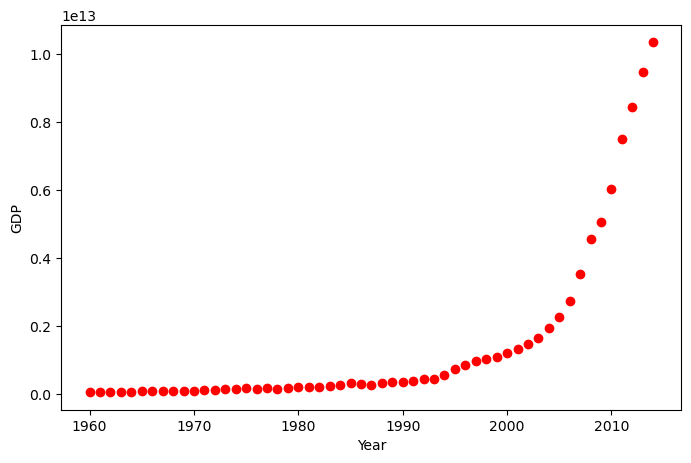

In [122]:
plt.figure(figsize=(8,5))
x_data, y_data = (data["Year"].values, data["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

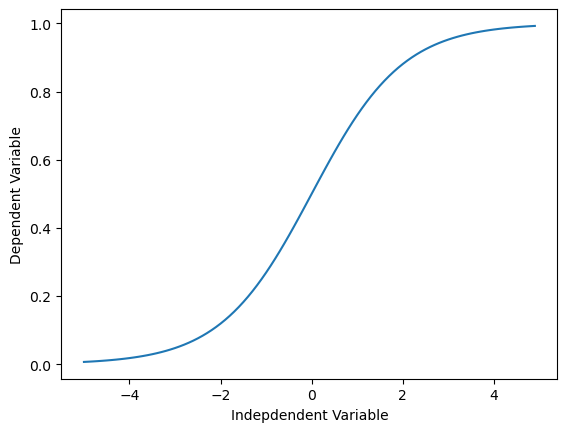

In [123]:
X = np.arange(-5,5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


In [124]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y


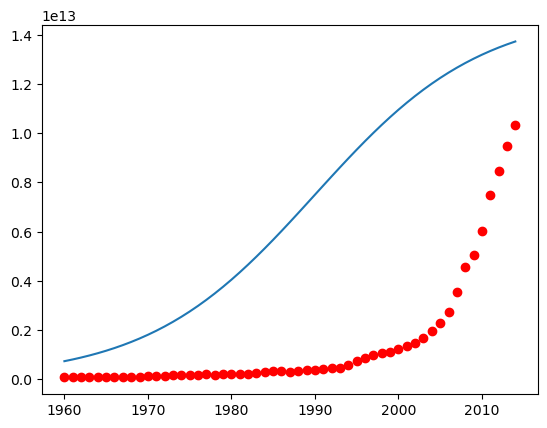

In [125]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')


In [126]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)


In [127]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.451712, beta_2 = 0.997207


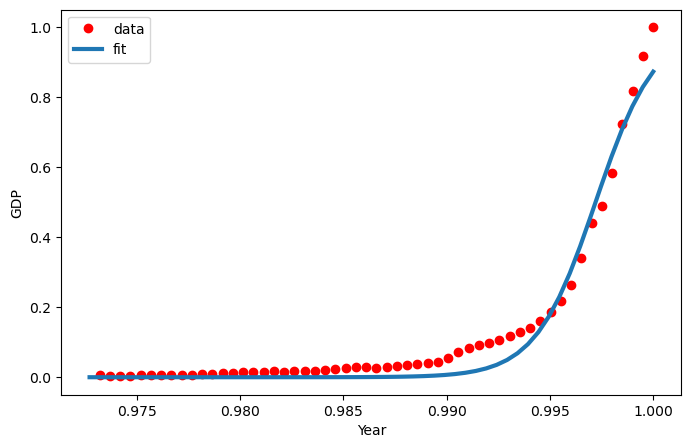

In [128]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [129]:
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.26
Residual sum of squares (MSE): 0.17
R2-score: -809291932079344316992403149946880.00


# Another model

In [167]:
# Define the non-linear function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [168]:
# Extract the input and output variables
xdata = data.iloc[:, 0].values
ydata = data.iloc[:, 1].values

In [169]:
xdata

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [170]:
ydata

array([5.91841165e+10, 4.95570502e+10, 4.66851785e+10, 5.00973033e+10,
       5.90622549e+10, 6.97091531e+10, 7.58794348e+10, 7.20570286e+10,
       6.99934979e+10, 7.87188205e+10, 9.15062113e+10, 9.85620238e+10,
       1.12159814e+11, 1.36769878e+11, 1.42254742e+11, 1.61162492e+11,
       1.51627687e+11, 1.72349014e+11, 1.48382112e+11, 1.76856525e+11,
       1.89649992e+11, 1.94369049e+11, 2.03549627e+11, 2.28950201e+11,
       2.58082147e+11, 3.07479586e+11, 2.98805793e+11, 2.71349773e+11,
       3.10722214e+11, 3.45957486e+11, 3.58973230e+11, 3.81454704e+11,
       4.24934066e+11, 4.42874596e+11, 5.62261130e+11, 7.32032045e+11,
       8.60844098e+11, 9.58159425e+11, 1.02527690e+12, 1.08944711e+12,
       1.20526068e+12, 1.33223472e+12, 1.46190649e+12, 1.64992872e+12,
       1.94174560e+12, 2.26859890e+12, 2.72978403e+12, 3.52309431e+12,
       4.55843107e+12, 5.05941974e+12, 6.03965851e+12, 7.49243210e+12,
       8.46162316e+12, 9.49060260e+12, 1.03548317e+13])

In [171]:

# Extract the x and y data from the dataframe
xdata = np.array(data['Year'])
ydata = np.array(data['Value'])


In [172]:
# Fit the data using curve_fit
popt, pcov = curve_fit(func, xdata, ydata)


In [173]:
# Print the optimal parameters
print('Optimal parameters: a=%f, b=%f, c=%f' % (popt[0], popt[1], popt[2]))



Optimal parameters: a=1.000000, b=1.000000, c=1.000000


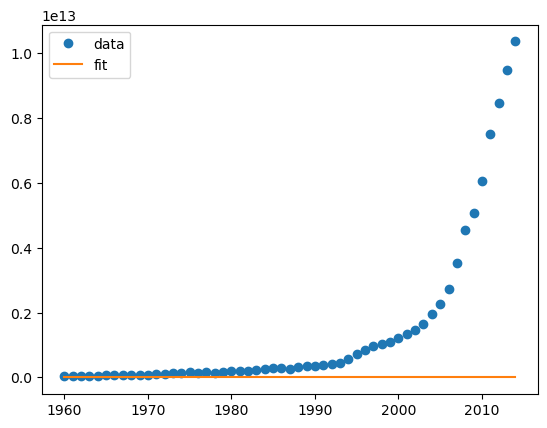

In [174]:
# Plot the data and the fitted curve
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, func(xdata, *popt), '-', label='fit')
plt.legend()
plt.show()


In [175]:
# Calculate the R-squared
residuals = ydata - func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata - np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the R-squared
print('R-squared:', r_squared)

R-squared: -0.33651026669432027
